# Suport Vector Machine - SVM

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('projetos.csv', sep=',')

df_renomear = {
    'unfinished' : 'nao_finalizado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
}

df = df.rename(columns = df_renomear)

troca = {
    1 : 0,
    0 : 1
}

df['finalizado'] = df.nao_finalizado.map(troca)

In [4]:
df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


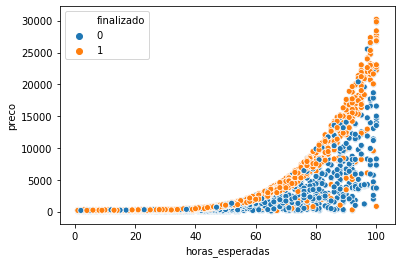

In [5]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas', y='preco', data=df)
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=df)

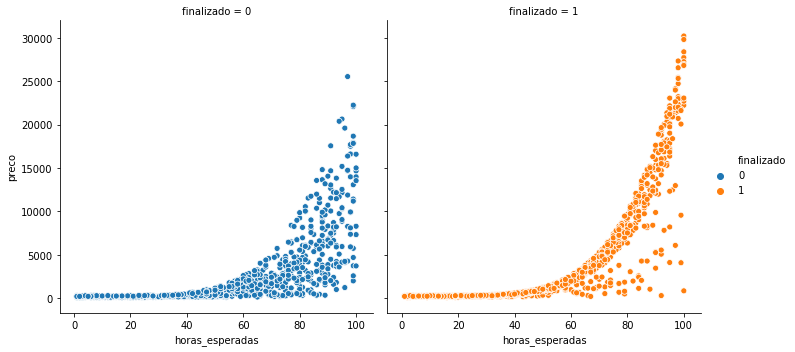

In [6]:
sns.relplot(x='horas_esperadas', y='preco', hue='finalizado', col='finalizado', data=df)

### SVM Linear

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

X = df[['horas_esperadas', 'preco']]
y = df['finalizado']

X_train, X_test, y_train, y_test = train_test_split( X, y, 
                                                     random_state = SEED,
                                                     test_size = 0.25,
                                                     stratify = y)

print('Treinamos com %d elementos e testamos com %d elementos' % (len(X_train), len(X_test)))


model = LinearSVC()
model.fit(X_train, y_train)

previsoes = model.predict(X_test)
acuracia = accuracy_score(y_test, previsoes) * 100

print('Acertou: %.2f%%' % acuracia) 

Treinamos com 1617 elementos e testamos com 540 elementos
Acertou: 55.19%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(y_test, previsoes_de_base) * 100
print('O algoritimo de base(baseline) acertou: %d.2f%%' % acuracia)

O algoritimo de base(baseline) acertou: 52.2f%


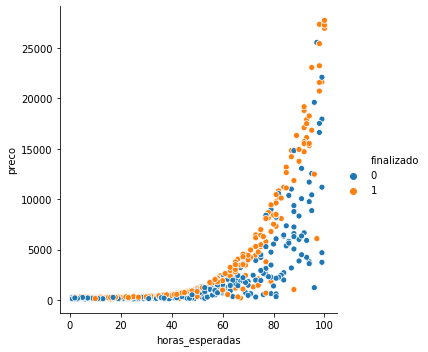

In [25]:
sns.relplot(x='horas_esperadas', y='preco', hue=y_test, data=X_test)

### Pegar os valores máximos e mínimos de X e Y.
### Valores do gráfico

In [26]:
x_min = X_test.horas_esperadas.min()
x_max = X_test.horas_esperadas.max()

y_min = X_test.preco.min()
y_max = X_test.preco.max()

In [27]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [28]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

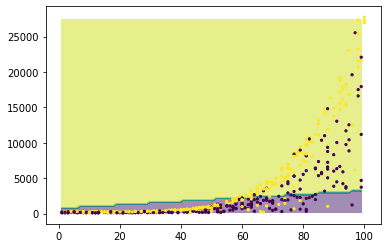

In [29]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_test.horas_esperadas, X_test.preco, c=y_test, s=5)

### SVM Não Linear

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


SEED = 20

X = df[['horas_esperadas', 'preco']]
y = df['finalizado']

X_train_raw, X_test_raw, y_train, y_test = train_test_split( X, y, 
                                                     random_state = SEED,
                                                     test_size = 0.25,
                                                     stratify = y)


scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

print('Treinamos com %d elementos e testamos com %d elementos' % (len(X_train), len(X_test)))


model = SVC()
model.fit(X_train, y_train)

previsoes = model.predict(X_test)
acuracia = accuracy_score(y_test, previsoes) * 100

print('Acertou: %.2f%%' % acuracia) 

Treinamos com 1617 elementos e testamos com 540 elementos
Acertou: 70.37%


In [33]:
X_test

array([[ 1.31877996,  0.68930393],
       [-0.04650315, -0.41576315],
       [-0.39657574, -0.5651287 ],
       ...,
       [ 0.86368559, -0.03748942],
       [-0.95669189, -0.5706828 ],
       [-1.41178625, -0.58913034]])

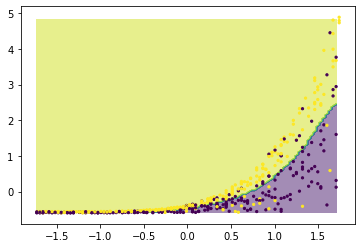

In [36]:
data_X = X_test[:,0]
data_y = X_test[:,1]

x_min = data_X.min()
x_max = data_X.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(data_X, data_y, c=y_test, s=5)